In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandasql as pdsql

In [2]:
df=sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [6]:
df.shape

(891, 15)

In [7]:
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

# Dropping Duplicates in the dataset# 

In [8]:
df.duplicated().sum()

107

In [9]:
df=df.drop_duplicates()
df.reset_index()
df.shape

(784, 15)

In [10]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# # Removing an feature due to high missing values

In [11]:
data_missing=df.isna()

In [12]:
data_missing_count = data_missing.sum()
data_missing_count

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
data_missing_count/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.255102
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.234694
embark_town     0.255102
alive           0.000000
alone           0.000000
dtype: float64

In [14]:
# In 'deck' column 74% values are null values so we are droping this column
df= df.drop('deck',axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


# Handling Missing values 

In [15]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
s_impute = SimpleImputer(strategy = "most_frequent")
k_impute = KNNImputer(n_neighbors=2)
df['embarked'] = s_impute.fit_transform(df[['embarked']])
df['embark_town'] = s_impute.fit_transform(df[['embark_town']])
df['age'] = k_impute.fit_transform(df[['age']])

In [17]:
df.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town    False
alive          False
alone          False
dtype: bool

# Encoding Categorical attributes

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          784 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     784 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  embark_town  784 non-null    object  
 12  alive        784 non-null    object  
 13  alone        784 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 75.9+ KB


In [19]:
df['sex'].value_counts()

male      491
female    293
Name: sex, dtype: int64

In [20]:
df['sex'] = df['sex'].replace({'male':1 , 'female':0})

In [21]:
df['sex'].value_counts()

1    491
0    293
Name: sex, dtype: int64

In [22]:
df['age'] = df['age'].astype(int)

In [23]:
df['age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 784 entries, 0 to 890
Series name: age
Non-Null Count  Dtype
--------------  -----
784 non-null    int32
dtypes: int32(1)
memory usage: 9.2 KB


In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [25]:
df['embarked'].value_counts()

S    570
C    155
Q     59
Name: embarked, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
l_impute = LabelEncoder()
df['embarked'] = l_impute.fit_transform(df['embarked'])

In [27]:
df['embarked'].value_counts()

2    570
0    155
1     59
Name: embarked, dtype: int64

In [28]:
df['class'].value_counts()

Third     405
First     214
Second    165
Name: class, dtype: int64

In [29]:
df['class'] = df['class'].replace({'First':1 , 'Second' :2 , 'Third': 3})

In [30]:
df['class'].value_counts()

3    405
1    214
2    165
Name: class, dtype: int64

In [31]:
df['who'].value_counts()

man      451
woman    251
child     82
Name: who, dtype: int64

In [32]:
df['who'] = l_impute.fit_transform(df['who'])

In [33]:
df['who'].value_counts()

1    451
2    251
0     82
Name: who, dtype: int64

In [34]:
df['adult_male'].value_counts()

True     451
False    333
Name: adult_male, dtype: int64

In [35]:
df['adult_male'] = df['adult_male'].replace({True: 1, False:0})

In [36]:
df['adult_male'].value_counts()

1    451
0    333
Name: adult_male, dtype: int64

In [37]:
df['embark_town'].value_counts()

Southampton    570
Cherbourg      155
Queenstown      59
Name: embark_town, dtype: int64

In [38]:
df['embark_town'] = l_impute.fit_transform(df['embark_town'])

In [39]:
df['embark_town'].value_counts()

2    570
0    155
1     59
Name: embark_town, dtype: int64

In [40]:
df['alive'].value_counts()

no     461
yes    323
Name: alive, dtype: int64

In [41]:
df['survived'].value_counts()

0    461
1    323
Name: survived, dtype: int64

In [42]:
df['alive'] = df['alive'].replace({'no':0 , 'yes':1})

In [43]:
df['alive'].value_counts()

0    461
1    323
Name: alive, dtype: int64

In [44]:
df['alone'].value_counts()

True     446
False    338
Name: alone, dtype: int64

In [45]:
df['alone'] = l_impute.fit_transform(df['alone'])

In [46]:
df['alone'].value_counts()

1    446
0    338
Name: alone, dtype: int64

In [47]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22,1,0,7.2500,2,3,1,1,2,0,0
1,1,1,0,38,1,0,71.2833,0,1,2,0,0,1,0
2,1,3,0,26,0,0,7.9250,2,3,2,0,2,1,1
3,1,1,0,35,1,0,53.1000,2,1,2,0,2,1,0
4,0,3,1,35,0,0,8.0500,2,3,1,1,2,0,1


In [48]:
correlation_matrix = df.corr()

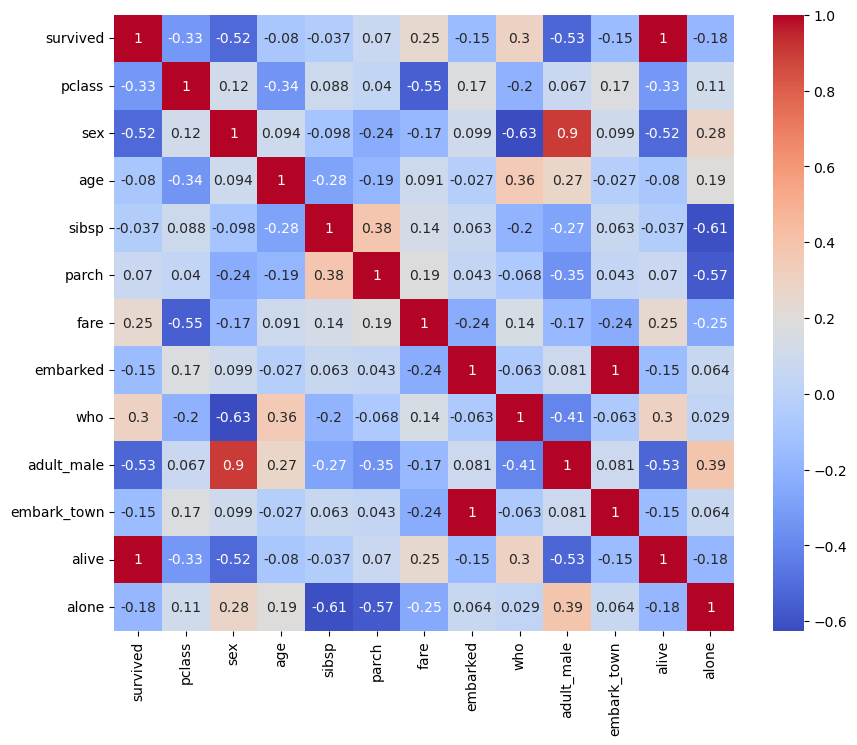

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [50]:
correlation_threshold = 0.9

highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Highly correlated pairs:", highly_correlated_pairs)


Highly correlated pairs: [('survived', 'alive'), ('embarked', 'embark_town')]


In [51]:
df = df.drop('alive',axis=1)

In [52]:
df = df.drop('embark_town',axis=1)

In [53]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22,1,0,7.2500,2,3,1,1,0
1,1,1,0,38,1,0,71.2833,0,1,2,0,0
2,1,3,0,26,0,0,7.9250,2,3,2,0,1
3,1,1,0,35,1,0,53.1000,2,1,2,0,0
4,0,3,1,35,0,0,8.0500,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39,0,5,29.1250,1,3,2,0,0
887,1,1,0,19,0,0,30.0000,2,1,2,0,1
888,0,3,0,29,1,2,23.4500,2,3,2,0,0
889,1,1,1,26,0,0,30.0000,0,1,1,1,1


In [54]:
df['pclass'].value_counts()

3    405
1    214
2    165
Name: pclass, dtype: int64

In [55]:
#sns.pairplot(df)

In [56]:
from scipy.stats import zscore
z_scores = zscore(df['age'])

# Define Z-score threshold
z_score_threshold = 3

# Identify outliers
outlier_indices = abs(z_scores) > z_score_threshold

# Remove outliers
df2 = df[~outlier_indices]

In [57]:
df2.reset_index()

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,0,3,1,22,1,0,7.2500,2,3,1,1,0
1,1,1,1,0,38,1,0,71.2833,0,1,2,0,0
2,2,1,3,0,26,0,0,7.9250,2,3,2,0,1
3,3,1,1,0,35,1,0,53.1000,2,1,2,0,0
4,4,0,3,1,35,0,0,8.0500,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,885,0,3,0,39,0,5,29.1250,1,3,2,0,0
776,887,1,1,0,19,0,0,30.0000,2,1,2,0,1
777,888,0,3,0,29,1,2,23.4500,2,3,2,0,0
778,889,1,1,1,26,0,0,30.0000,0,1,1,1,1


In [58]:
(df['age']==0).sum()

6

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    int64   
 3   age         784 non-null    int32   
 4   sibsp       784 non-null    int64   
 5   parch       784 non-null    int64   
 6   fare        784 non-null    float64 
 7   embarked    784 non-null    int32   
 8   class       784 non-null    category
 9   who         784 non-null    int32   
 10  adult_male  784 non-null    int64   
 11  alone       784 non-null    int64   
dtypes: category(1), float64(1), int32(3), int64(7)
memory usage: 65.2 KB


In [60]:
df['survived'].corr(df['parch'])

0.07030724761714094

In [61]:
df = df[df['age']!=0]
df.reset_index()

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,0,3,1,22,1,0,7.2500,2,3,1,1,0
1,1,1,1,0,38,1,0,71.2833,0,1,2,0,0
2,2,1,3,0,26,0,0,7.9250,2,3,2,0,1
3,3,1,1,0,35,1,0,53.1000,2,1,2,0,0
4,4,0,3,1,35,0,0,8.0500,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,885,0,3,0,39,0,5,29.1250,1,3,2,0,0
774,887,1,1,0,19,0,0,30.0000,2,1,2,0,1
775,888,0,3,0,29,1,2,23.4500,2,3,2,0,0
776,889,1,1,1,26,0,0,30.0000,0,1,1,1,1


In [62]:
data

NameError: name 'data' is not defined

In [ ]:
df['class'] = df['class'].astype(int)

In [ ]:
df = df.drop('sibsp',axis=1)

In [ ]:
df = df.drop('parch',axis=1)

In [ ]:
df

In [ ]:
Indepvar=[]
for col in df.columns:
    if col !='survived':
        Indepvar.append(col)
Targetvar ='survived'

x= df[Indepvar]
y=df[Targetvar]
x

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [ ]:
x_train

In [ ]:
from sklearn.linear_model import LogisticRegression

ModelLR= LogisticRegression()

ModelLR.fit(x_train,y_train)

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

In [ ]:
# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)




# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);



# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)




# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLR.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')